# Baseline Analysis

In [10]:
import tempfile
import os
import numpy as np
from msmbuilder.example_datasets import FsPeptide
from msmbuilder.dataset import dataset
from msmbuilder.featurizer import DihedralFeaturizer
from sklearn.decomposition import PCA
import mdtraj as md
import msmbuilder.utils as msmUtils
from msmbuilder.tpt import mfpts
import matplotlib.pyplot as plt

In [28]:
%matplotlib inline

In [8]:
# Base path for all files
base = 'C:\Users\MinCheol\Documents\TJ_data'

## FsPeptide Baseline MFPT

#### MFPT vs RMSD Plots

In [13]:
# import the msm, raw XYZ coordinates, and the cluster assignments
#fs_msm = msmUtils.load(base + '\\fspeptide\msm\msm.pkl')
X = np.loadtxt(base + '\\fspeptide\sim_datasets\\raw_XYZ_10000.csv', delimiter=',')
cluster_assignments = np.loadtxt(base + '\\fspeptide\msm\msm_clustering_labels.csv', delimiter=',')

In [14]:
fs_msm = msmUtils.load(base + '\\fspeptide\msm\msm.pkl')

IOError: Unable to load C:\Users\MinCheol\Documents\TJ_data\fspeptide\msm\msm.pkl using the pickle or joblib protocol.
Pickle: unsupported pickle protocol: 3
Joblib: unsupported pickle protocol: 3

In [60]:
# Collect MFPT
fs_mfpt_matrix = (mfpts(fs_msm) + mfpts(fs_msm).T)/2

In [69]:
# Parameters for MFPT plots
num_frames = X.shape[0]
num_points = 500

In [70]:
distances = []
mfpt_times = []
for p in range(num_points):
    frame_pair = np.random.randint(low=0, high=num_frames-1, size=2)
    msm_frame_pair = (fs_msm.mapping_[cluster_assignments[frame_pair[0]]], fs_msm.mapping_[cluster_assignments[frame_pair[1]]])
    if msm_frame_pair[0] != msm_frame_pair[1] and mfpt_matrix[msm_frame_pair[0]][msm_frame_pair[1]] > 0:
        distances.append(np.linalg.norm(X[frame_pair[0],:] - X[frame_pair[1], :]))
        mfpt_times.append(mfpt_matrix[msm_frame_pair[0]][msm_frame_pair[1]])

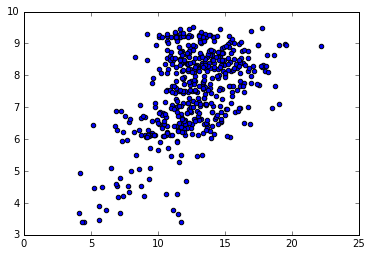

In [71]:
plt.scatter(np.array(distances), np.log(np.array(mfpt_times)))

## Calmodulin Baseline

In [68]:
# import the msm, raw XYZ coordinates, and the cluster assignments
cal_msm = msmUtils.load('C:\Users\minch_000\Documents\TJ_data\calmodulin\msm_out\Assignments.Fixed.h5')

IOError: Unable to load C:\Users\minch_000\Documents\TJ_data\calmodulin\msm_out\Assignments.Fixed.h5 using the pickle or joblib protocol.
Pickle: 'H'
Joblib: 'H'